<center>
<h2>Interactive Visualization with Jupyter Notebook and Matplolib.</h2>
<h3>DV1604 Interactive Laboratories.</h3>
<h3>Blekinge Institute of Technology.</h3>
<h3>2024.</h3>
<img src="bth.png" width="100">
<h5>Designed and Developed by Diego Navarro Tek.Lic., modified by Milena Angelova, PhD 2024.</h5>
</center>

---

## Description

The following document summarizes the different techniques presented during lab 2, to implement interactivity to the plots created with Python and Matplotlib. The goal of this activity is to familiarize the students with some of the libraries and tools that can enhance the way data is presented when developing data representations in Python.

The document covers the following concepts:
- Interactive Navigation.
- GUI Tools.
- Reconfiguring interaction.
- Filtering interaction.
- Cursor Annotations.
- Animated Plots.

> ⚠️ **Warning**: This document assumes students are already familiar with Matplotlib, Pandas, and Numpy. If additional help with these libraries is required, make sure to review the handouts from Lab 1 and Lab 2.

> ⚠️ **Warning**: Some of the outputs from the examples in this document are not being rendered correctly, since they must have an HTML environment to be displayed. However, if you run the provided code in a Jupyter Notebook, you should be able to see the missing result.

---
## 1. Setup and Review of Previous Concepts

First, to review some of the concepts covered in previous labs, an example of 2D and 3D visualizations are implemented. We start by initializing the magic command `%matplotlib inline` from iPython, to allow plotting within the notebook itself.

In [9]:
%matplotlib inline

Now, we load all the libraries that are going to be used for the development of this lab. First, we load Matplotlib, Pandas, and Numpy. After, we load the *mplot3d toolkit* from matplotlib using the command `from mpl_toolkits.mplot3d import *`. `mplot3d` is an additional toolkit bundled with Matplotlib, that enables additional functionalities over 3D plots.

Next, we load *ipywidgets* using the command `import ipywidgets as widgets`. `ipywidgets` is the core library used to implement GUI elements (based on HTML) within the Jupyter notebook. Addtionally, we load the package *interact* module from ipywidgets using `from ipywidgets import interact`. `interact` allows us to create custom behavior to the GUI elements we create using ipywidgets.

After, we import *mplcursors* using the command `import mplcursors`. This library provides interactive data selection cursors for Matplotlib.

Lastly, we import the module *animation*, which is also bundled with Matplolib, using the command `import matplotlib.animation as animation`. This module allows us to compute animation data and use it within a figure. Also, we import the *HTML* module from the *IPython.display* library, using the command `from IPython.display import HTML`. HTML enables the use of a HTML-based animation controllers within a Jupyter notebook's cell.

> 📚 **Additional Material**: For more information, review the [mplot3d documentation](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=mplot3d), the [ipywidgets documentation](https://ipywidgets.readthedocs.io/en/latest/index.html), the [mplcursors API](https://mplcursors.readthedocs.io/en/stable/mplcursors.html), the [matplotlib.animation module documentation](https://matplotlib.org/stable/api/animation_api.html?highlight=animation#module-matplotlib.animation), and the [IPython.display documentation](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) respectively.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import *

import ipywidgets as widgets
from ipywidgets import interact

import mplcursors

import matplotlib.animation as animation
from IPython.display import HTML

To have some data to work with, we now load the same data set provided for Lab 1.

In [11]:
data = pd.read_csv("C:/Skola/Github Repon/DV1604_G7/Lab3/2019.csv")


We create multiple data frames to make a plot using 2 and 3 categorical variables respectively. In the following example, the features of *social support, GDP per capita, Healthy life expectancy, and perception of corruption* are stored in independant data frames.

In [12]:
social_support = data["Social_support"]
gdp_per_capita = data["GDP_per_capita"]
healthy_life_expectancy = data["Healthy_life_expectancy"]
perception_of_corruption = data["Perceptions_of_corruption"]


For the first example, we plot an example using 2 categorical variables (GDP and social support in this case). 

Text(0.5, 1.0, 'GDP VS Social Suport')

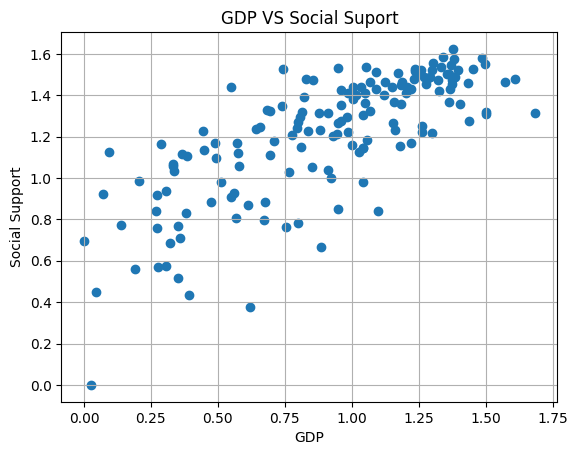

In [13]:
fig = plt.figure()
axis = fig.add_subplot()
axis.scatter(gdp_per_capita, social_support)
axis.grid()
axis.set_xlabel("GDP")
axis.set_ylabel("Social Support")
axis.set_title("GDP VS Social Suport")

For the next example, we make a 3D plot using 3 variables (GDP, social support, and healthy life experience respectively).  

Text(0.5, 0.92, 'GDP VS Social Suport VS Life')

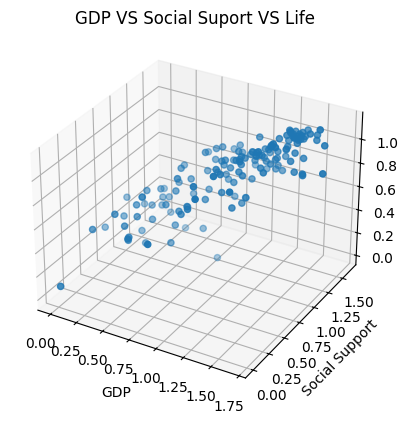

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection= "3d")
ax.scatter(gdp_per_capita, social_support, healthy_life_expectancy)
ax.grid()
ax.set_xlabel("GDP")
ax.set_ylabel("Social Support")

ax.set_title("GDP VS Social Suport VS Life")

So far, we have created static visualizations with Matplotlib and Pandas. However, we now make small modifications to enable interactivity within our plots.

---

## 2. Interactive Control Via Widget Plots

The `ipywidgets` library is arguably one of the more effective ways to enable interactive plotting within the Jupyter notebook.
To modify the way the plotting information is processed and redenred by the Jupyter notebook, and enabling interactiviity in our plots, we use the `%matplotlib widget` magic command.

> ⚠️ **Warning**: In order to use the `%matplotlib widget` command, we need to previously install and additional package called [ipympl](https://github.com/matplotlib/ipympl). We do this by running the following commands **as an administrator**, using the anaconda promt: `conda install -c conda-forge ipympl`, and `conda install -c conda-forge ipywidgets`.

In [15]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

### 2.1 Interactive Navigation

Once the previous magic command is enabled, all future plots will be rendered with the widget functionality.
Now, to highlight the way interactive navigation is implemented with `ipywidgets`, let's plot again the previous examples.

Text(0.5, 0.92, 'GDP VS Social Suport VS Life')

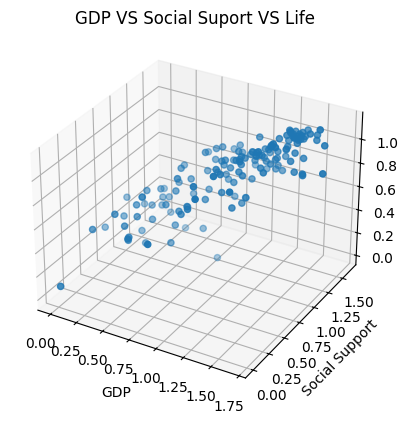

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection= "3d")
ax.scatter(gdp_per_capita, social_support, healthy_life_expectancy)
ax.grid()
ax.set_xlabel("GDP")
ax.set_ylabel("Social Support")

ax.set_title("GDP VS Social Suport VS Life")

By plotting using `ipywidgets`, our visualizations are enhanced with interactive navigation, zooming, and resizing capabilities. It also enables a quick save function for our plots.

Just as the 2D example, 3D plots also obtain interactive navigation, zooming, resizing and saving.

---

### 2.2 GUI Tools

An additional feature provided by the `%matplotlib widget` magic command is the creation of GUI elements, using the `interact` method from `ipywidgets`. The `interact` method requires 2 parameters for its implementation:
1. A reference to the *funtion* we desire to add interactivity to.
2. An *interaction variable* to store the GUI element and any number of its parameters.

> 📚 **Additional Material**: For more information review the [interact()](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) documentation.

> ⚠️ **Warning**: The interaction variable we use in the `interact` method should be used as a parameter in the function we apply interactivity to (that's how we link them together). Also, remember to add a `;` at the end of the `interact` function to remove the output message from the jupyter notebook.

There are two different ways to create GUI elements using the `interact` method: 
1. We can let `ipywidgets` automatically generate the GUI elements for us. This method is recommended when we don't need detailed control, or any custom behavior over the element.
2. We can manually call a specific command, unique to each GUI element, to declare and initialize it. In this way, we can add detailed behavior or additional properties to the element.

For the majority of examples covered in this document, we use the *automatic generation method* provided by `ipywidgets`. Nevertheless, an example of a manual declarion is provided in section 2.3.

> 📚 **Additional Material**: For a detailed list of the GUI elements available with `ipywidgets`, review the [Jupyter Widget List](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html) documentation.

The type of GUI element that is automatically generated by `ipywidgets`, depends on how the *interaction variable* is initialized. The GUI elements that can be automatically generated are:


#### Sliders
For enabling sliders, we need to initialize the interaction variable with an integer value.

In [16]:
def f(x):
    return x
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

#### Checkboxes
For checkboxes, we initialize the interaction variables with a boolean value.

In [17]:

def f(x):
    return x
interact(f, x=False)


interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

#### Text boxes
For text boxes, we initialize the interaction variable with a string of characters. 

#### Dropdown menus
Lastly, for the dropdown menus, we initialize the interaction variable with a list.

> 💡 **Tip**: These previous GUI elements can be combined together, by declaring each element in separate interaction variables.

***

### 2.3 Reconfiguring Interaction

By including these `ipywidget` GUI elements in our interactive plots, we can expand the functionality of how the data is represented, and presented to the viewer. Let's build an example implementing the *reconfiguring* interaction type using polynomial regressions. First, we create a scatter plot using the data stored in the `gdp` and `corruption` data frames, and we calculate the polinomial coefficients to draw a linear regression.

For the previous example we have used a level 1 polynomial regression. Now we will implement a slider that returns a number between 1 and 5, and use that number to update the level of our polynomial regression. To do so we need to implement 3 additional functions in our previous code:
1. `f` will be the main plotting function, that we will implement interaction to. It will receive the regression level from the slider, calculate the polynomial coefficients, and plot the data.
2. `erase_plot` will be the function responsible of clearing the canvas on the figure, every time the slider is used.
3. `interact` will be used to reference the plotting function `f`, and to auto-generate the slider GUI using the variable `level`.

Even if the slider works correctly, there is an error associated with the previous slider implementation. If we let the `interact` function auto-generate the GUI elements, we lose the possibility of adding custom properties to them. In the last example, we are not able to limit the range of data that should be covered by the slider, and we require a different type of declaration to meet this criterion.

To address this limitation we simply change the method we are using to declare the slider. Instead of using an integer number, we will manually declare a slider element using the `widget.IntSlider` command. With this method, we can now set a limit for the data range covered by the slider using the `min`, `max`, `step`, and `value` parameters respectively.

***

### 2.3 Filtering Interaction

We now implement a filtering interaction example. Checkboxes will be used to determine which data is rendered in the plot, and colors will be used for encoding  the data from each respective data frame shown in the plot. We will visualize the data from the `gdp` against the data from `social`, `life`, and `corruption` data frames.

First, we implement a static plot with the selected data frames.

Similarly to the reconfiguring example, we now need to implement 3 additional functions to enable the filtering interaction:
1. `f` will be the main plotting function, that we will implement interaction to. It will receive a set of boolean variables (one for each visualized data frame), to control which data is rendered in the plot.
2. `erase_plot` will be the function responsible of clearing the canvas on the figure, every time any checkbox is used.
3. `interact` will be used to reference the plotting function `f`, and to auto-generate the checkboxes using the variables `Social`, `Life`, and `Corruption`.

---

## 3. Cursor Annotations

An additional feature that we can implement for our interactive plots, is *cursor annotations*. With this technique, viewers can click on any data point shown in the plot, and obtain additional information about that point. We implement cursor annotations by the *mplcursors* library. 

For the following example, we will re-visit an exercise from lab 1. Then, we created a very long plot to highlight the Happiness Index Score of every country included in the data set. We did it that way to address the overlapping label from the country names. However in this opportunity, we will plot the Hapinnes Index Score of the Y axis, and display the name of the country only when the viewer clicks its a point in the plot.

First, we plot the raw information from the Countries over the X axis, and the Happiness score over the Y axis.

Now, we need to remove the clutter shown with the country names overlapping. We will do this by disabling the labels over the X axis with the `ax.xaxis.set_ticks([])` command.

Lastly, we will use the mplcursors library to create a new cursor based on our axis variable `ax`, using the command `mplcursors.cursor(ax)`. With the cursor declared, we set an event callback using the function `connect()`. Two different types of events can be connected with the`connect()` function: *selecting* and *de-selecting*. For this example, we will add a callback every time the viewer selects a point by clicking on it. We do this by entering the `"add"` parameter. All together the expression is written as `mplcursors.cursor(ax).connect("add")`.

Even if the previous changes display the information from every selected point, we are going to further refine the way data is shown in our cursor annotation by using a *lambda function*. We declare a lambda function called `sel`, and using it as an additional parameter for `connect()`, we set the annotation text that should be displayed in the cursor using the `sel.annotation.set_text()` command. After, we need to specify from where `annotation.set_text()` should take the information for the annotation. Since the names of the countries are alöready stored in `x`, we send this variable as the final parameter. This gives us the final expression `mplcursors.cursor(ax).connect("add", lambda sel:sel.annotation.set_text(x[sel.index]))`.



> 💡 **Tip**: A lambda function is a short anonymous function (i.e. function inside a function) that can take any number of arguments, but can only have one expression. Lambda functions are commonly used to expand the implementation details of established function parameters. 

> 📚 **Additional Material**: For more information,  review the [Lambda function documentation](https://docs.python.org/3/glossary.html#term-lambda) and the [cursor class documentation](https://mplcursors.readthedocs.io/en/stable/mplcursors.html#mplcursors.Cursor).

---

## 4. Animated Plots

In addition to the widget functionality through `ipywidgets`, Matplotlib offers native support for animated plots through its `matplotlib.animation` class. In the following example, we will animate a sine function using Matplotlib.

> 📚 **Additional Material**: For more information, review the [animation class documentation](https://matplotlib.org/stable/api/animation_api.html).

First we create the linear space for the X axis using `np.linspace`, and store it in the `x_val` variable. Then, we store the values of the expression $y = sin(x)$ in the `y_val` variable. 

For this example, we need to animate 2 different plots: one *red dot* which represents the current position of the pair $(x,y)$, and a *pink line* following the trajectory covered by the dot along the sine function. 

When we execute the plotting command `ax.plot()`, 2 different outputs are generated for Matplotlib: an element of the `matplotlib.lines.Line2D` to render and control the graphical attributes of the line plot, and a list containing the information used for the plotting. However, since we are animating the output of the sine function, the data used to render the plot is going to be in constant update. Because of this, we cannot implement a regular axis plotting (`ax.plot()`). To address this issue, we need to make a partial assignation of the `matplotlib.lines.Line2D` element into an independent variable, and implement a function to update of the list containing the data that needs to be rendered, for every frame of the animation.

To make the partial assignations, we declare `dot, = ax.plot([], [], 'o', color='red')` for the red dot, and `linegraph, = ax.plot([], [], color='pink')` for the pink line. We sent a series of empty lists `[]` in the `ax.plot` commands to make the partial assignations possible, and we will update that data using a function called `animate`.

The function `animate` receives a parameter called `interval`. This parameter is usually used to control the refresh rate of an animation (i.e. how often a new frame should be rendered). However, in this example, we use it to navigate through the numerical space created in `x_val`, and to update the list of $(x,y)$ values that should be plotted by `dot` and `linegraph`, using the `dot.set_data` and the `linegraph.set_data` respectively. 

Next, we create the animation by repeatedly calling the `animate` function, using the `animation.FuncAnimation` class. For the parameters required by `animation.FuncAimation`, we use `fig` as the rendering area for the animation, `animate` as the function to be constantly called, `frames` as the total amount of frames to be rendered, and `interval` as the increase step over the data stored in `x_val`.

Lastly, we store all the computed animation data from `animation.FuncAnimation` into a variable called `anim`.

> 📚 **Additional Material**: For more information review the [matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html), the [animation.FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) documentation.

TypeError: update() got an unexpected keyword argument 'frames'

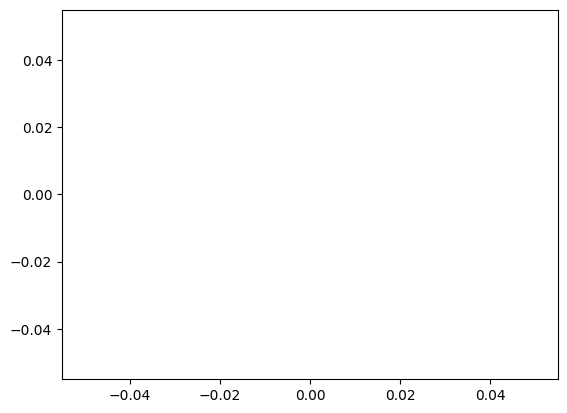

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
x_val = 10

def  update(frame, ax, x):
    y = data[frame]
    line, = ax.plot([], [], 'bo', markersize=4)
ax.plot([], [], "o", color= "red")
animation.FuncAnimation(func=update(frames=range(len(data)), fargs=(ax, x_val), interval=25))
plt.show()

Even if the previous implementation correctly displays the animation for the sine function, it offers a very reduced level of control on how the animation is being played. To address this limitation, and to finish this example, we use the animation data stored in `anim`, to create an HTML representation of the sine animation using the `anim.to_jshtml()` method from the `animation.FuncAnimation` class.

***

This last plot will conclude lab 2! 🥳 🎉

Make sure to effectively use the tools from `ipywidets` and the `animation` module from Matplotlib, to address some of the limitations that may appear when visualizing data in static visualization, or when special behavior is needed in your plots!

***

## Bonus Example: Plotting Data in Real Time

As a bonus example, we implement a real-time data visualization, that updates itself every time new information is written in an external file. To achieve this, we develop a figure that repeatedly reads the information written in a separate text file called `animate.txt`. This file will contain the coordinates used by Matplotlib to generate a line plot. According to the logic from the script, every data point is separated by a new line (`\n`), and every value from a $(x,y)$ pair is separated by a comma (`,`).

You can make changes directly to the file and, after you saved it, Matplolib will automatically update the plot with the new data in the file!

***